In [3]:
import geopandas
from ipyleaflet import Map, Marker, Popup, basemaps, GeoData, MarkerCluster, FullScreenControl, LayersControl, basemap_to_tiles

In [4]:
import copy

In [5]:
# Data analysis libraries
%matplotlib inline
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np

In [6]:
# NWIS API library
!pip install dataretrieval
import dataretrieval.nwis as nwis

In [7]:
# Filesystem

import sys
sys.path.append("../../")

Parameters:

Temperature, air, °C : 00010

Nitrate plus nitrite, water, in situ, milligrams per liter as nitrogen: 99133

Dissolved oxygen, water, unfiltered, milligrams per liter: 00300

Discharge, cubic feed per second : 00060

In Washington State:

Multiple sites have temperature, DO data, and discharge
One site has nitrite/nitrate data (12473503)
No phosphate/phosphorus data

In [8]:
parameters = ["00010","99133","00300"]
startDate = "2019-04-20" # retroactively edited to reflect the nature of the data
endDate = "2021-07-19"

In [9]:
ALL_WA_DV = nwis.get_dv(stateCd="WA",parameterCd = parameters, start=startDate, end=endDate)

In [26]:
%store ALL_WA_DV

AttributeError: Can't pickle local object '_set_metadata.<locals>.<lambda>'

In [10]:
ALL_WA_DV[0]

00010_upper_Maximum  \
site_no         datetime                                         
1203951610      2019-04-20 00:00:00+00:00                  NaN   
                2019-04-21 00:00:00+00:00                  NaN   
                2019-04-22 00:00:00+00:00                  NaN   
                2019-04-23 00:00:00+00:00                  NaN   
                2019-04-24 00:00:00+00:00                  NaN   
...                                                        ...   
454314120413701 2021-07-15 00:00:00+00:00                  NaN   
                2021-07-16 00:00:00+00:00                  NaN   
                2021-07-17 00:00:00+00:00                  NaN   
                2021-07-18 00:00:00+00:00                  NaN   
                2021-07-19 00:00:00+00:00                  NaN   

                                          00010_upper_Maximum_cd  \
site_no         datetime                                           
1203951610      2019-04-20 00:00:00+00:00                    NaN   
                2019-04-21 00:00:00+00:00                    NaN   
                2019-04-22 00:00:00+00:00                    NaN   
                2019-04-23 00:00:00+00:00                    NaN   
                2019-04-24 00:00:00+00:00                    NaN   
...                                                          ...   
454314120413701 2021-07-15 00:00:00+00:00                    NaN   
                2021-07-16 00:00:00+00:00                    NaN   
                2021-07-17 00:00:00+00:00                    NaN   
                2021-07-18 00:00:00+00:00                    NaN   
                2021-07-19 00:00:00+00:00                    NaN   

                                           00010_middle, [middle_Maximum  \
site_no         datetime                                                   
1203951610      2019-04-20 00:00:00+00:00                            NaN   
                2019-04-21 00:00:00+00:00                            NaN   
                2019-04-22 00:00:00+00:00                            NaN   
                2019-04-23 00:00:00+00:00                            NaN   
                2019-04-24 00:00:00+00:00                            NaN   
...                                                                  ...   
454314120413701 2021-07-15 00:00:00+00:00                            NaN   
                2021-07-16 00:00:00+00:00                            NaN   
                2021-07-17 00:00:00+00:00                            NaN   
                2021-07-18 00:00:00+00:00                            NaN   
                2021-07-19 00:00:00+00:00                            NaN   

                                          00010_middle, [middle_Maximum_cd  \
site_no         datetime                                                     
1203951610      2019-04-20 00:00:00+00:00                              NaN   
                2019-04-21 00:00:00+00:00                              NaN   
                2019-04-22 00:00:00+00:00                              NaN   
                2019-04-23 00:00:00+00:00                              NaN   
                2019-04-24 00:00:00+00:00                              NaN   
...                                                                    ...   
454314120413701 2021-07-15 00:00:00+00:00                              NaN   
                2021-07-16 00:00:00+00:00                              NaN   
                2021-07-17 00:00:00+00:00                              NaN   
                2021-07-18 00:00:00+00:00                              NaN   
                2021-07-19 00:00:00+00:00                              NaN   

                                           00010_lower, [lower_Maximum  \
site_no         datetime                                                 
1203951610      2019-04-20 00:00:00+00:00                          NaN   
                2019-04-21 00:00:00+00:00                          NaN   

In [11]:
# Delete unnecessary columns (..cd) and destroy rows with missing parameters

# Daily values
WA_DVDF = ALL_WA_DV[0]

for column in WA_DVDF:
    if column.endswith("cd"):
        WA_DVDF = WA_DVDF.drop(columns=column)

for i in range(9):
    WA_DVDF = WA_DVDF.drop(columns=WA_DVDF.columns[0])

WA_DVDF = WA_DVDF.dropna(thresh = 9)

WA_DVDF

00300_Maximum  00300_Minimum  00300_Mean  \
site_no  datetime                                                              
12473503 2019-04-30 00:00:00+00:00           11.8           10.0        10.9   
         2019-05-01 00:00:00+00:00           11.4            9.8        10.6   
         2019-05-02 00:00:00+00:00           11.5            9.8        10.6   
         2019-05-03 00:00:00+00:00           11.4            9.7        10.5   
         2019-05-04 00:00:00+00:00           11.0            9.2        10.1   
...                                           ...            ...         ...   
         2021-04-27 00:00:00+00:00           12.0            9.4        10.2   
         2021-04-28 00:00:00+00:00           10.8            9.5        10.1   
         2021-04-29 00:00:00+00:00           10.3            9.2         9.7   
         2021-04-30 00:00:00+00:00           10.2            9.3         9.7   
         2021-05-01 00:00:00+00:00           10.4            9.2         9.8   

                                    99133_Maximum  99133_Minimum  99133_Mean  \
site_no  datetime                                                              
12473503 2019-04-30 00:00:00+00:00            3.6            2.9         3.2   
         2019-05-01 00:00:00+00:00            3.6            3.2         3.4   
         2019-05-02 00:00:00+00:00            3.6            2.9         3.3   
         2019-05-03 00:00:00+00:00            3.2            2.7         2.9   
         2019-05-04 00:00:00+00:00            3.4            2.7         3.0   
...                                           ...            ...         ...   
         2021-04-27 00:00:00+00:00            3.2            2.5         2.8   
         2021-04-28 00:00:00+00:00            3.5            2.6         3.1   
         2021-04-29 00:00:00+00:00            2.8            2.1         2.4   
         2021-04-30 00:00:00+00:00            2.4            1.9         2.1   
         2021-05-01 00:00:00+00:00            2.7            2.3         2.5   

                                    00010_Maximum  00010_Minimum  00010_Mean  
site_no  datetime                                                             
12473503 2019-04-30 00:00:00+00:00           16.6            9.4        12.9  
         2019-05-01 00:00:00+00:00           17.1           10.6        13.7  
         2019-05-02 00:00:00+00:00           17.7           10.5        13.9  
         2019-05-03 00:00:00+00:00           18.1           11.1        14.6  
         2019-05-04 00:00:00+00:00           20.0           12.2        16.0  
...                                           ...            ...         ...  
         2021-04-27 00:00:00+00:00           18.0           11.2        14.5  
         2021-04-28 00:00:00+00:00           18.1           12.4        15.3  
         2021-04-29 00:00:00+00:00           19.7           14.3        16.9  
         2021-04-30 00:00:00+00:00           19.1           15.1        16.8  
         2021-05-01 00:00:00+00:00           19.1           13.6        15.9  

[677 rows x 9 columns]

In [12]:
final_parameters = ["00060","00010","99133","00300"]
ringold_iv = nwis.get_record(sites="12473503",service="iv",parameterCd=final_parameters,start=startDate,end=endDate)
ringold_dv = nwis.get_record(sites="12473503",service="dv",parameterCd=final_parameters,start=startDate,end=endDate)

In [13]:
ringold_iv_final = ringold_iv.dropna(thresh=9)
ringold_iv_final = ringold_iv_final[["00060","00010","00300","99133"]]
ringold_iv_final

,00060,00010,00300,99133
datetime,,,,
2019-04-29T10:15:00.000-07:00,74.4,10.1,11.7,2.6
2019-04-29T10:30:00.000-07:00,75.5,10.3,11.7,2.6
2019-04-29T10:45:00.000-07:00,76.6,10.5,11.6,2.6
2019-04-29T11:00:00.000-07:00,77.7,10.7,11.6,2.6
2019-04-29T11:15:00.000-07:00,76.6,10.9,11.5,2.6
...,...,...,...,...
2021-05-02T11:00:00.000-07:00,36.1,13.9,10.5,2.8
2021-05-02T11:15:00.000-07:00,36.8,14.1,10.4,2.8
2021-05-02T11:30:00.000-07:00,36.1,14.4,10.3,2.8


In [14]:
ringold_dv_final = ringold_dv

ringold_dv_final = ringold_dv_final.dropna(thresh = 21)

for column in ringold_dv_final:
    if column.endswith("cd") or column.endswith("Maximum") or column.endswith("Minimum"):
        ringold_dv_final = ringold_dv_final.drop(columns=column)
        
ringold_dv_final = ringold_dv_final.drop(columns='site_no')

ringold_dv_final

,00010_Mean,00060_Mean,00300_Mean,99133_Mean
datetime,,,,
2019-04-30 00:00:00+00:00,12.9,51.0,10.9,3.2
2019-05-01 00:00:00+00:00,13.7,40.7,10.6,3.4
2019-05-02 00:00:00+00:00,13.9,42.6,10.6,3.3
2019-05-03 00:00:00+00:00,14.6,58.5,10.5,2.9
2019-05-04 00:00:00+00:00,16.0,50.5,10.1,3.0
...,...,...,...,...
2021-04-27 00:00:00+00:00,14.5,36.1,10.2,2.8
2021-04-28 00:00:00+00:00,15.3,52.7,10.1,3.1
2021-04-29 00:00:00+00:00,16.9,69.6,9.7,2.4


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

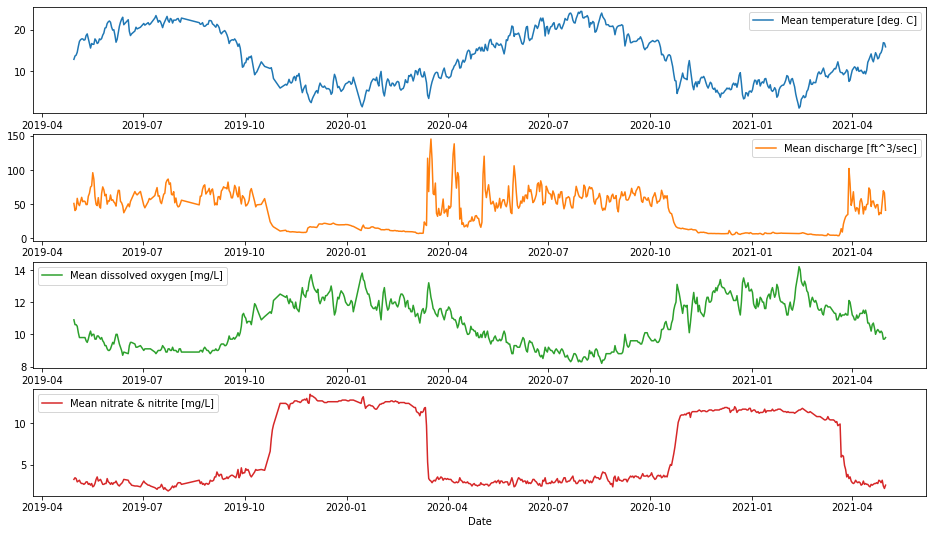

In [30]:
'''
namesdv = {
    '00300_Maximum':'Max. dissolved oxygen [mg/L]',
    '00300_Minimum':'Min. dissolved oxygen [mg/L]',
    '00300_Mean':'Mean dissolved oxygen [mg/L]',

    '99133_Maximum':'Max. nitrate & nitrite [mg/L]',
    '99133_Minimum':'Min. nitrate & nitrite  [mg/L]',
    '99133_Mean':'Mean nitrate & nitrite [mg/L]',

    '00010_Maximum':'Max. temperature [deg. C]',
    '00010_Minimum':'Min. temperature [deg. C]',
    '00010_Mean':'Mean temperature [deg. C]',
    
    '00060_Mean' : 'Mean discharge [ft^3/sec]'
}
'''
namesdv = {
    '00300_Mean':'Mean dissolved oxygen [mg/L]',
    '99133_Mean':'Mean nitrate & nitrite [mg/L]',
    '00010_Mean':'Mean temperature [deg. C]',
    '00060_Mean' : 'Mean discharge [ft^3/sec]'
}

ringold_dv_toPlot = ringold_dv_final.rename(columns=namesdv)

ringold_dv_toPlot.plot(subplots = True, figsize=(16,9), xlabel='Date', sharex=False,sharey=False)

,Discharge [ft^3/sec],Temperature [deg C],Dissolved oxygen [mg/L],Nitrate & nitrite [mg/L]
datetime,,,,
2019-04-29T10:15:00.000-07:00,74.4,10.1,11.7,2.6
2019-04-29T10:30:00.000-07:00,75.5,10.3,11.7,2.6
2019-04-29T10:45:00.000-07:00,76.6,10.5,11.6,2.6
2019-04-29T11:00:00.000-07:00,77.7,10.7,11.6,2.6
2019-04-29T11:15:00.000-07:00,76.6,10.9,11.5,2.6
...,...,...,...,...
2021-05-02T10:45:00.000-07:00,36.1,13.6,10.5,2.8
2021-05-02T11:00:00.000-07:00,36.1,13.9,10.5,2.8
2021-05-02T11:15:00.000-07:00,36.8,14.1,10.4,2.8


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

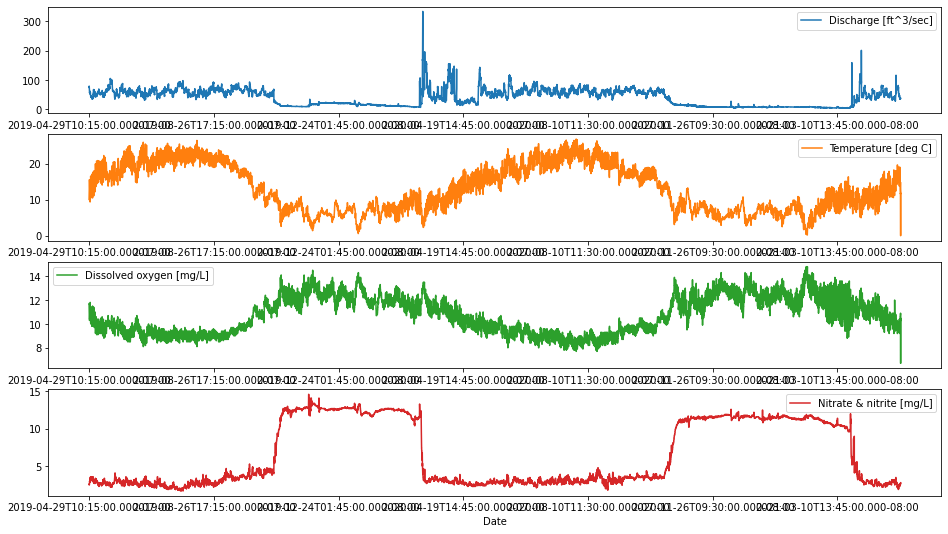

In [31]:
namesiv = {
    '00300':'Dissolved oxygen [mg/L]',
    '99133':'Nitrate & nitrite [mg/L]',
    '00010':'Temperature [deg C]',
    '00060':'Discharge [ft^3/sec]',
}

ringold_iv_toPlot = copy.deepcopy(ringold_iv_final)

ringold_iv_toPlot[ringold_iv_toPlot['00300'] < 0] = np.nan

ringold_iv_toPlot.dropna(thresh=1, inplace = True)

ringold_iv_toPlot.rename(columns=namesiv, inplace = True)

display(ringold_iv_toPlot)

ringold_iv_toPlot.plot(subplots = True, figsize=(16,9), xlabel='Date', sharex=False,sharey=False)

12510500

In [17]:
kiona_iv = nwis.get_record(sites="12510500",service="iv",parameterCd=final_parameters,start=startDate,end=endDate)
kiona_dv = nwis.get_record(sites="12510500",service="dv",parameterCd=final_parameters,start=startDate,end=endDate)

In [18]:
kiona_iv_final = kiona_iv.dropna(thresh=9)
kiona_iv_final = kiona_iv_final[["00060","00010","00300","99133"]]
kiona_iv_final

,00060,00010,00300,99133
datetime,,,,
2019-04-20T00:00:00.000-07:00,5270.0,15.3,9.3,0.67
2019-04-20T00:15:00.000-07:00,5270.0,15.3,9.3,0.67
2019-04-20T00:30:00.000-07:00,5290.0,15.3,9.3,0.67
2019-04-20T00:45:00.000-07:00,5290.0,15.3,9.3,0.67
2019-04-20T01:00:00.000-07:00,5300.0,15.3,9.3,0.67
...,...,...,...,...
2021-07-19T22:45:00.000-07:00,1410.0,26.4,8.1,-999999.00
2021-07-19T23:00:00.000-07:00,1410.0,26.3,7.9,-999999.00
2021-07-19T23:15:00.000-07:00,1410.0,26.3,7.8,-999999.00


,Discharge [ft^3/sec],Temperature [deg C],Dissolved oxygen [mg/L],Nitrate & nitrite [mg/L]
datetime,,,,
2019-04-20T00:00:00.000-07:00,5270.0,15.3,9.3,0.67
2019-04-20T00:15:00.000-07:00,5270.0,15.3,9.3,0.67
2019-04-20T00:30:00.000-07:00,5290.0,15.3,9.3,0.67
2019-04-20T00:45:00.000-07:00,5290.0,15.3,9.3,0.67
2019-04-20T01:00:00.000-07:00,5300.0,15.3,9.3,0.67
...,...,...,...,...
2020-09-30T23:45:00.000-07:00,2130.0,16.9,9.2,1.20
2020-10-01T00:00:00.000-07:00,2130.0,16.8,9.2,1.20
2020-10-01T00:15:00.000-07:00,2130.0,16.8,9.1,1.19


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

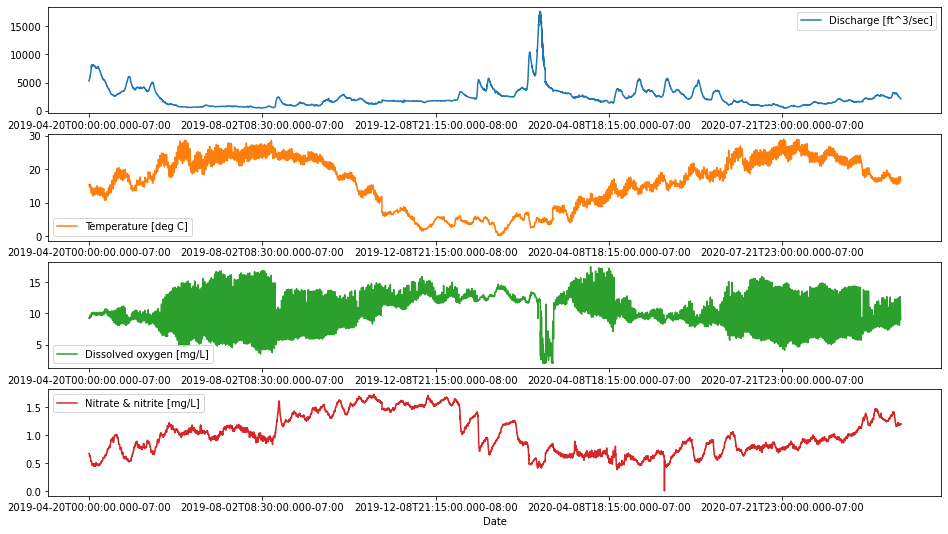

In [32]:
namesiv = {
    '00300':'Dissolved oxygen [mg/L]',
    '99133':'Nitrate & nitrite [mg/L]',
    '00010':'Temperature [deg C]',
    '00060':'Discharge [ft^3/sec]',
}

kiona_iv_toPlot = copy.deepcopy(kiona_iv_final)

kiona_iv_toPlot[kiona_iv_toPlot['99133'] < 0] = np.nan

kiona_iv_toPlot[kiona_iv_toPlot['00010'] < 0] = np.nan

kiona_iv_toPlot.dropna(thresh=1, inplace = True)

kiona_iv_toPlot.rename(columns=namesiv, inplace = True)

display(kiona_iv_toPlot)

# Graphing

kiona_iv_toPlot.plot(subplots=True, figsize=(16,9), xlabel='Date', sharex=False,sharey=False)

<AxesSubplot:xlabel='Discharge [ft^3/sec]', ylabel='Nitrate & nitrite [mg/L]'>

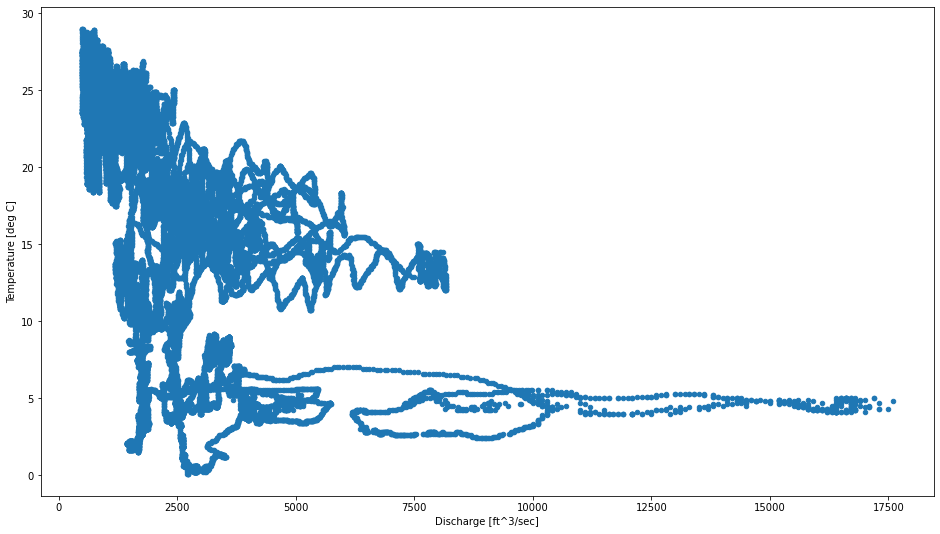

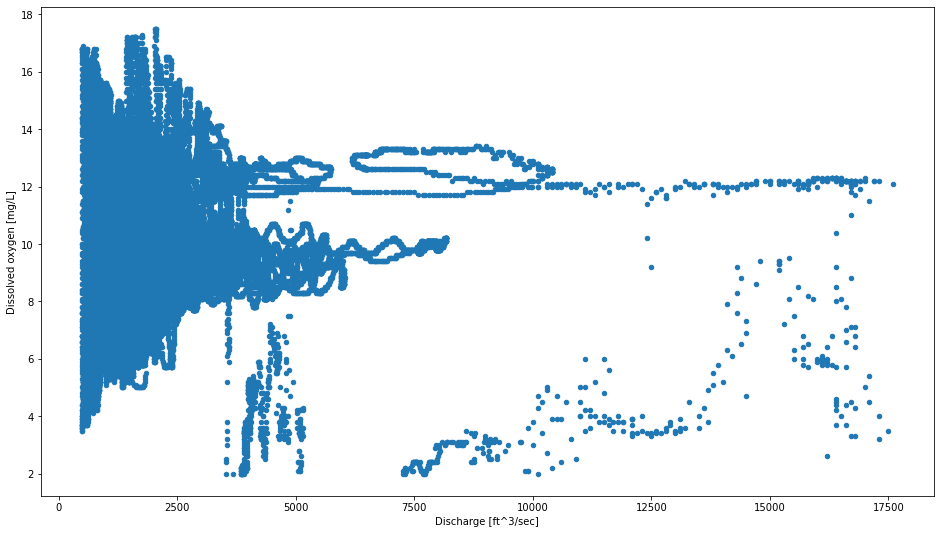

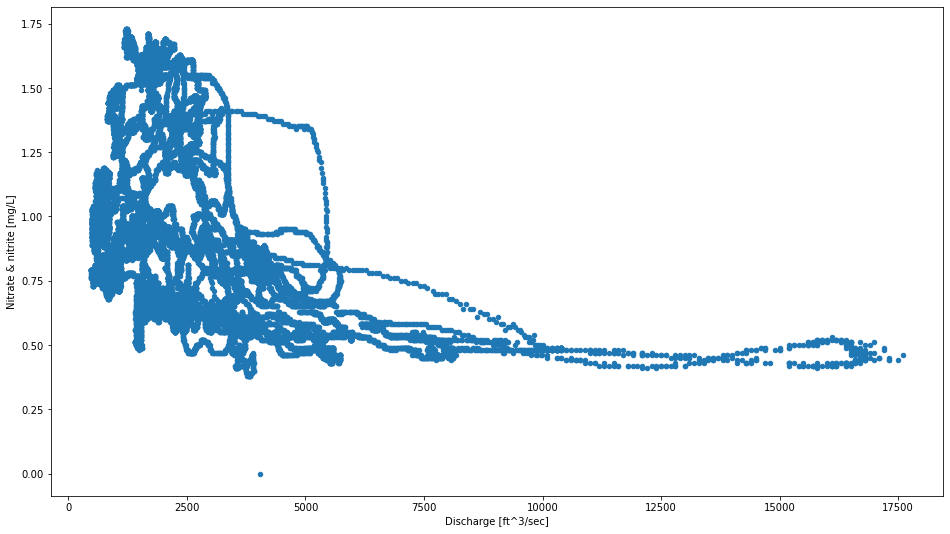

In [20]:
# Discharge [ft^3/sec]	Temperature [deg C]	Dissolved oxygen [mg/L]	Nitrate & nitrite [mg/L]
kiona_iv_toPlot.plot(x="Discharge [ft^3/sec]", y="Temperature [deg C]",kind='scatter',figsize=(16,9))
kiona_iv_toPlot.plot(x="Discharge [ft^3/sec]", y="Dissolved oxygen [mg/L]",kind='scatter',figsize=(16,9))
kiona_iv_toPlot.plot(x="Discharge [ft^3/sec]", y="Nitrate & nitrite [mg/L]",kind='scatter',figsize=(16,9))


In [21]:
nwis.get_info(sites=['12473503','12510500'])[0]

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,local_time_fg,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no
0,USGS,12473503,"SCBID WB 5 WASTEWAY NEAR MOUTH NEAR RINGOLD,WA",ST-DCH,463211.48,1191648.25,46.536522,-119.280069,N,S,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USGS,12510500,"YAKIMA RIVER AT KIONA, WA",ST,461513.00,1192837.00,46.253467,-119.478079,M,S,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
m = Map(center=(47,-120), zoom=7)

m.add_layer(Marker(title='SCBID WB 5 WASTEWAY NEAR MOUTH NEAR RINGOLD,WA',location=(46.536522,-119.280069),rise_on_hover = True, draggable = False))
m.add_layer(Marker(title='YAKIMA RIVER AT KIONA, WA',location = (46.253467,-119.478079),rise_on_hover = True, draggable = False))
m.add_layer(Marker(title='NOAA STATION - ICE HARBOR DAM',location = (46.2447,-118.8786),rise_on_hover = True, draggable = False))

basemap1 = basemap_to_tiles(basemaps.Esri.WorldImagery)
m.add_layer(basemap1)

display(m)

Map(center=[47, -120], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [23]:
NOAA_DATA = pd.read_csv("noaa_station_data.csv")

In [24]:
NOAA_DATA

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP
0,USC00453883,"ICE HARBOR DAM, WA US",46.2447,-118.8786,112.2,2019-04-20,0.12
1,USC00453883,"ICE HARBOR DAM, WA US",46.2447,-118.8786,112.2,2019-04-21,0.01
2,USC00453883,"ICE HARBOR DAM, WA US",46.2447,-118.8786,112.2,2019-04-22,0.00
3,USC00453883,"ICE HARBOR DAM, WA US",46.2447,-118.8786,112.2,2019-04-23,0.00
4,USC00453883,"ICE HARBOR DAM, WA US",46.2447,-118.8786,112.2,2019-04-24,0.00
...,...,...,...,...,...,...,...
806,USC00453883,"ICE HARBOR DAM, WA US",46.2447,-118.8786,112.2,2021-07-15,0.00
807,USC00453883,"ICE HARBOR DAM, WA US",46.2447,-118.8786,112.2,2021-07-17,0.00
808,USC00453883,"ICE HARBOR DAM, WA US",46.2447,-118.8786,112.2,2021-07-18,0.00
809,USC00453883,"ICE HARBOR DAM, WA US",46.2447,-118.8786,112.2,2021-07-19,0.00


<AxesSubplot:xlabel='DATE'>

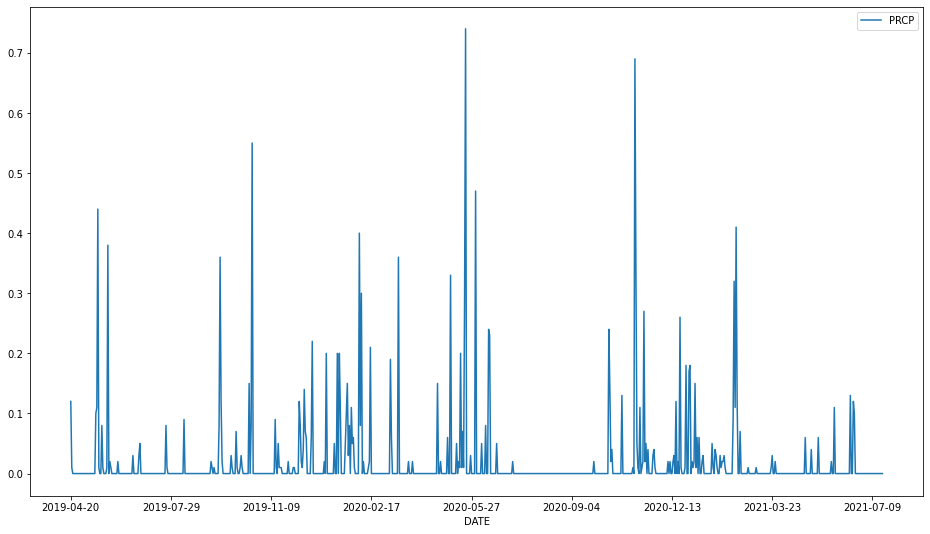

In [25]:
NOAA_DATA[["DATE","PRCP"]].plot(x="DATE",y="PRCP",figsize=(16,9))